 -------------------------------------------------------------------------------

 Carga de datos: Importamos el dataset desde GitHub usando pd.read_csv() con el delimitador correcto (;) y verificamos las primeras filas para confirmar la estructura.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/DorianDavy89/data-asma/refs/heads/main/dataAsma.csv"
df = pd.read_csv(url, delimiter=';')  # ¡Clave aquí!

# Verificar columnas y primeras filas
print("Columnas del dataset:")
print(df.columns.tolist())
print("\nPrimeras 5 filas:")
print(df.head())

Columnas del dataset:
['PatientID', 'FEV1', 'Eosinófilos', 'FeNO', 'Síntomas', 'Gravedad_GINA']

Primeras 5 filas:
  PatientID  FEV1  Eosinófilos  FeNO  Síntomas Gravedad_GINA
0       P01    56          200    20         0         grave
1       P02    89          300    30         2      moderado
2       P03    50          350    40         1         grave
3       P04    40          654    65         2         grave
4       P05    60          150    80         1         grave


--------------------------------------------------------------------------------
Preprocesamiento: Seleccionamos las columnas relevantes (FEV1, Eosinófilos, FeNO, Síntomas) y codificamos la variable objetivo (Gravedad_GINA) a valores numéricos (0, 1, 2). Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%).

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Características y variable objetivo
features = ['FEV1', 'Eosinófilos', 'FeNO', 'Síntomas']
target = 'Gravedad_GINA'

X = df[features]
y = df[target]

# Codificar la variable objetivo (leve -> 0, moderado -> 1, grave -> 2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("\nDistribución de clases en entrenamiento:", np.bincount(y_train))
print("Distribución de clases en prueba:", np.bincount(y_test))


Distribución de clases en entrenamiento: [25  3 12]
Distribución de clases en prueba: [4 3 3]


--------------------------------------------------------------------------------
Entrenamiento: Creamos y entrenamos un modelo de Random Forest con los datos de entrenamiento, ajustando 100 árboles de decisión.


Reporte de Clasificación:
              precision    recall  f1-score   support

       grave       0.80      1.00      0.89         4
        leve       1.00      0.67      0.80         3
    moderado       1.00      1.00      1.00         3

    accuracy                           0.90        10
   macro avg       0.93      0.89      0.90        10
weighted avg       0.92      0.90      0.90        10



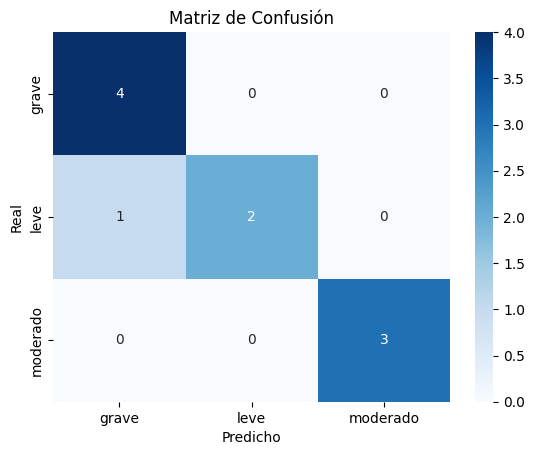

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en datos de prueba
y_pred = model.predict(X_test)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

--------------------------------------------------------------------------------
Evaluación: Predecimos en el conjunto de prueba y generamos un reporte de clasificación (precisión, recall) y una matriz de confusión para visualizar aciertos/errores.


Importancia de las características:
       Feature  Importance
0         FEV1    0.434463
3     Síntomas    0.386669
1  Eosinófilos    0.108797
2         FeNO    0.070072


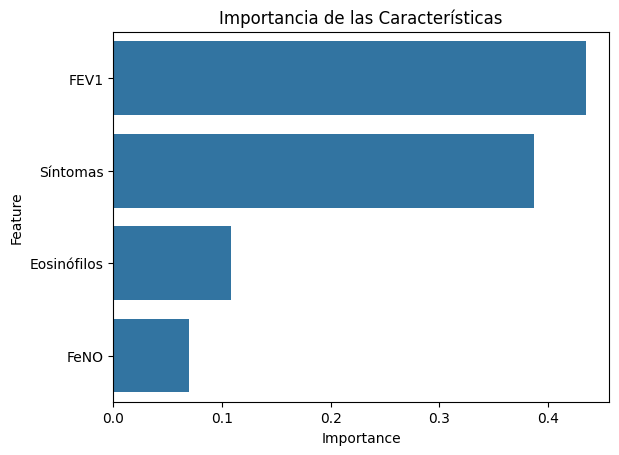

In [9]:
# Características
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nImportancia de las características:")
print(feature_importance)

# Gráfico de importancia
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las Características')
plt.show()

--------------------------------------------------------------------------------
Guardado: Exportamos el modelo entrenado a un archivo .pkl para reutilizarlo sin reentrenar.

In [10]:
import joblib

# Guardar modelo
joblib.dump(model, 'modelo_asma_gina.pkl')


['modelo_asma_gina.pkl']

In [11]:
# Filtro pacientes clasificados como "grave" por el modelo
pacientes_grave = df.iloc[X_test.index][y_pred == le.transform(['grave'])[0]]
print("\nPacientes clasificados como 'grave' por el modelo:")
print(pacientes_grave[['FEV1', 'Síntomas', 'Gravedad_GINA']])


Pacientes clasificados como 'grave' por el modelo:
    FEV1  Síntomas Gravedad_GINA
39    80         0          leve
30    67         1         grave
48    48         1         grave
26    68         0         grave
25    65         0         grave
